## Classification: Bank Marketing Data

### About
The bank marking dataset contains information from a Portuguese banking institution's direct marketing campaign (phone calls). This project aims to predict if the client will subscribe to a term deposit (variable y). In this notebook, I'll use logistic regression, k-nearest neighbors, decision tree, neural network, and support vector machine and compare their accuracy.

Data used:Bank Marketing Data Set(http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

### Importing Data and Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Banking/bank-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
label_encoder = LabelEncoder()
df1 = df.apply(label_encoder.fit_transform)
x = df1.iloc[:, 0:16]
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

num = []
scores = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_knn = knn.score(X_test, y_test)
    num.append(i)
    scores.append(score_knn)
dic = dict(zip(num, scores))
k = max(dic, key=dic. get)
score_knn = max(scores)

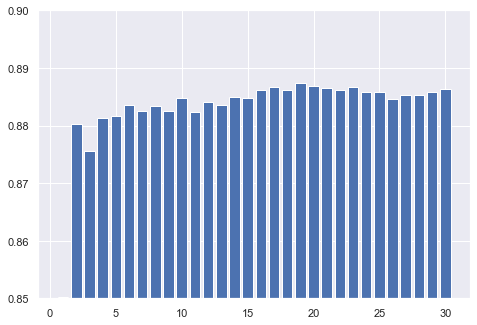

The number of neighbors that maximize the accuracy is 19 ,and its accuracy is 0.88743 .


In [5]:
sns.set_theme()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(num,scores)
ax.set_ylim(0.85,0.9)
plt.show()
print('The number of neighbors that maximize the accuracy is',k,',and its accuracy is',max(scores).round(5),'.')

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
score_logistic = logistic_reg.score(X_test,y_test)

### Decision Tree

In [7]:
from sklearn import tree
tree_fit = tree.DecisionTreeClassifier()
tree_fit.fit(X_train, y_train)
score_tree = tree_fit.score(X_test, y_test)

### Neural Network

In [8]:
from sklearn.neural_network import MLPClassifier
MNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
MNN.fit(X_train, y_train)
score_MNN = MNN.score(X_test, y_test)

### Support vector machine

In [9]:
from sklearn import svm
svm_fit = svm.SVC()
svm_fit.fit(X_train, y_train)
score_svm = svm_fit.score(X_test,y_test)

### Comparison

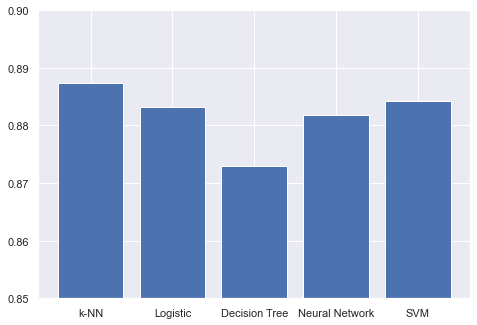

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['k-NN', 'Logistic', 'Decision Tree', 'Neural Network', 'SVM']
score_test = [score_knn,score_logistic,score_tree,score_MNN,score_svm]
ax.bar(models,score_test)
ax.set_ylim(0.85,0.9)

plt.show()

In [12]:
print('The best result I got is', max(score_test).round(8))

The best result I got is 0.88742674
